In [2]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import alt as alt
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'AGE7','GENDER','RACETH','ECON4A','ECON4B','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
# df.isna().sum()

#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_27912\919149335.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_27912\919149335.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_27912\919149335.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)
C:\User

In [64]:
df.isna().sum()

SOC1         0
SOC2A        0
SOC2B        0
SOC3A        0
SOC3B        0
            ..
ECON4B       0
HHINCOME     0
EDUCATION    0
HHSIZE1      0
HH_BANNER    0
Length: 67, dtype: int64

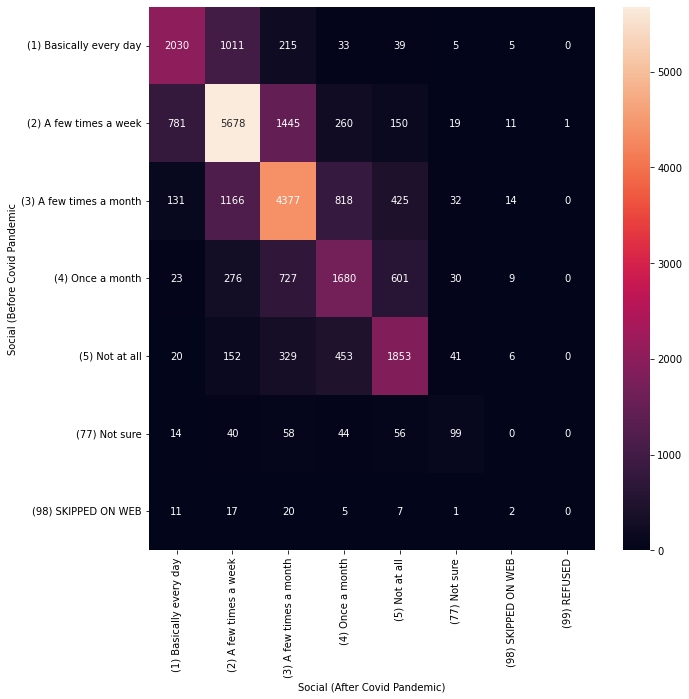

In [7]:
#SE1: Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import matplotlib.pyplot as plt
import seaborn as sns
SE1 = pd.crosstab(df['SOC2B'],
                  df['SOC2A'],
                 margins = False)

fig, ax = plt.subplots(figsize=(10, 10))
s= sns.heatmap(SE1, annot=True,fmt='g')
s.set(xlabel='Social Realtionships (After Covid Pandemic)', ylabel='Social Relationships (Before Covid Pandemic')
plt.savefig("C:\python\SE01-CROSS.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [62]:
# se1_apr = df1[['SOC2B','SOC2A']]
# se1_apr.drop(se1_apr.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
# se1_apr.value_counts()



C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\2184661682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se1_apr.drop(se1_apr.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)


SOC2B                    SOC2A                  
(2) A few times a week   (2) A few times a week     1856
(3) A few times a month  (3) A few times a month    1535
(1) Basically every day  (1) Basically every day     656
(5) Not at all           (5) Not at all              637
(4) Once a month         (4) Once a month            631
(2) A few times a week   (3) A few times a month     531
(1) Basically every day  (2) A few times a week      390
(3) A few times a month  (2) A few times a week      362
                         (4) Once a month            325
(4) Once a month         (5) Not at all              244
(2) A few times a week   (1) Basically every day     241
(4) Once a month         (3) A few times a month     220
(5) Not at all           (4) Once a month            165
(3) A few times a month  (5) Not at all              163
(5) Not at all           (3) A few times a month     118
(2) A few times a week   (4) Once a month             96
(4) Once a month         (2) A few time

In [61]:
# SE1 : Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import numpy as np
# SE1 = pd.get_dummies(df[['SOC2B','SOC2A']])
#
# SE1 = pd.get_dummies(df[['SOC2B','SOC2A']])

se1_1=df1[['SOC2B','SOC2A']]

se1_apr = df1[['SOC2B','SOC2A']]
# se1_apr = se1_apr[se1_apr.SOC2B != '(77) Not sure']]

# se1_apr.drop(se1_apr.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)

data1B=se1_1['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC2B','SOC2A']]
data2B=se1_2['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC2B','SOC2A']]
data3B=se1_3['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
data1 = pd.concat([data1B['unique_values'],x], axis = 1)

x




,april_before,april_after,may_before,may_after,june_before,june_after
0,13.259606,10.990765,13.153193,11.813310,13.305752,13.185640
1,32.219815,31.581348,33.217954,33.050469,33.951688,34.832510
2,28.172386,28.810854,27.679768,28.662349,26.865074,27.719205
3,13.658648,14.376924,13.398839,12.539080,12.651808,12.131323
4,11.332801,13.156995,11.076373,12.795891,11.584145,11.090351
5,1.094516,0.889294,1.205895,0.926753,1.427999,0.880822
6,0.262228,0.182419,0.267977,0.212148,0.213533,0.160149


C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\2892764678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_age1.drop(se2_age1.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\2892764678.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_age1.drop(se2_age1.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\2892764678.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

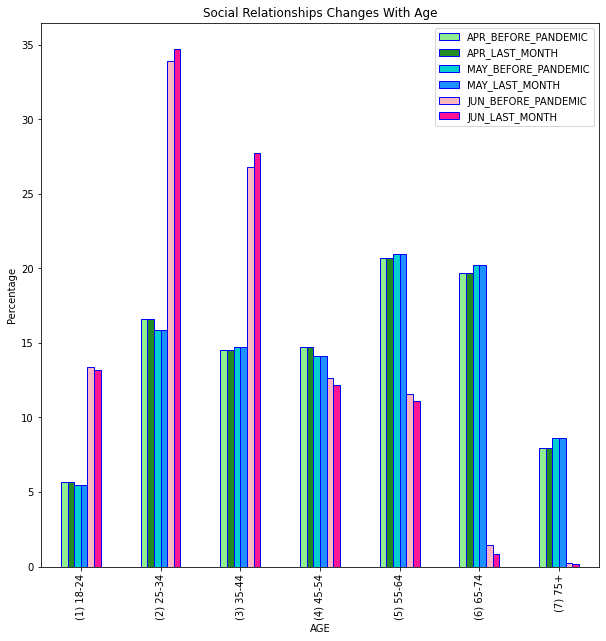

In [222]:
#histogram
se2_age1=df1[['SOC2B','SOC2A','AGE7']]
se2_age2=df2[['SOC2B','SOC2A','AGE7']]
se2_age3=df3[['SOC2B','SOC2A','AGE7']]

se2_age1.drop(se2_age1.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_age1.drop(se2_age1.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age1.drop(se2_age1.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_age1.drop(se2_age1.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age1.drop(se2_age1.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)

se2_age2.drop(se2_age2.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_age2.drop(se2_age2.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age2.drop(se2_age2.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_age2.drop(se2_age2.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age2.drop(se2_age2.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)

se2_age3.drop(se2_age3.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_age3.drop(se2_age3.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age3.drop(se2_age3.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_age3.drop(se2_age3.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age3.drop(se2_age3.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)

se2_age1.drop(se2_age1.loc[df['AGE7']== '(88) Removed for disclosure risk'].index, inplace=True)
se2_age2.drop(se2_age2.loc[df['AGE7']== '(88) Removed for disclosure risk'].index, inplace=True)
se2_age3.drop(se2_age3.loc[df['AGE7']== '(88) Removed for disclosure risk'].index, inplace=True)


se2_age1b= se2_age1[['SOC2B','AGE7']]
se2_age1a= se2_age1[['SOC2A','AGE7']]

data1B=se2_age1b['AGE7'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='APR_BEFORE_PANDEMIC')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se2_age1a['AGE7'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='APR_LAST_MONTH')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se2_age2b= se2_age2[['SOC2B','AGE7']]
se2_age2a= se2_age2[['SOC2A','AGE7']]

data2B=se2_age2b['AGE7'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='MAY_BEFORE_PANDEMIC')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se2_age2a['AGE7'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='MAY_LAST_MONTH')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se2_age3b= se2_age3[['SOC2B','AGE7']]
se2_age3a= se2_age3[['SOC2A','AGE7']]

data3B=se2_age3b['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='JUN_BEFORE_PANDEMIC')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se2_age3a['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='JUN_LAST_MONTH')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['APR_LAST_MONTH'],data2B['MAY_BEFORE_PANDEMIC'],data2A['MAY_LAST_MONTH'],data3B['JUN_BEFORE_PANDEMIC'],data3A['JUN_LAST_MONTH']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
data1 = pd.concat([data1B['unique_values'],x], axis = 1)

data1

plotdata = pd.DataFrame({
 "APR_BEFORE_PANDEMIC":data1['APR_BEFORE_PANDEMIC'].values,
    "APR_LAST_MONTH":data1['APR_LAST_MONTH'].values,
    "MAY_BEFORE_PANDEMIC":data1['MAY_BEFORE_PANDEMIC'].values,
    "MAY_LAST_MONTH":data1['MAY_LAST_MONTH'].values,
    "JUN_BEFORE_PANDEMIC":data1['JUN_BEFORE_PANDEMIC'].values,
    "JUN_LAST_MONTH":data1['JUN_LAST_MONTH'].values
    },
    index=data1['unique_values']
)
color_dict = {'APR_BEFORE_PANDEMIC':'#90EE90',
              'APR_LAST_MONTH':'#228B22',
              'MAY_BEFORE_PANDEMIC': '#00CED1',
              'MAY_LAST_MONTH': '#1E90FF',
              'JUN_BEFORE_PANDEMIC': '#FFB6C1',
              'JUN_LAST_MONTH': '#FF1493',
              }
plotdata.plot(kind="bar",figsize=(10,10) , color = color_dict,edgecolor=['b'])
plt.title("Social Relationships Changes With Age")
plt.xlabel("AGE")
plt.ylabel("Percentage")
# plt.savefig(SE01.png)
plt.savefig("C:\python\se2-hist-age.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')


In [83]:
se2_age=df[['SOC2B','SOC2A','AGE7']]

se2_age.drop(se2_age.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_age.drop(se2_age.loc[df['AGE7']== '(88) Removed for disclosure risk'].index, inplace=True)

se2_age['SOC2B']=se2_age['SOC2B'].str[1:]
se2_age['SOC2B'] = se2_age['SOC2B'].str.split(')').str[0].astype(int)
se2_age['SOC2A']=se2_age['SOC2A'].str[1:]
se2_age['SOC2A'] = se2_age['SOC2A'].str.split(')').str[0].astype(int)
# se2_age.value_counts()
# se2_age.isna().sum()
# se2_age['SOC2A'].values()



C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1287179214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_age.drop(se2_age.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1287179214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_age.drop(se2_age.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1287179214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
se2_age['SOC2A'].unique()


# df = pd.DataFrame(np.random.rand(10,4), columns=list('ABCD'))
# df['E'] = [1, 2, 1, 1, 1, 2, 1, 2, 2, 1]
# #
mask_e1 = se2_age['AGE7'] == "(1) 18-24"
mask_e2 = se2_age['AGE7'] == "(2) 25-34"
mask_e3 = se2_age['AGE7'] == "(3) 35-44"
mask_e4 = se2_age['AGE7'] == "(4) 45-54"
mask_e5 = se2_age['AGE7'] == "(5) 55-64"
mask_e6 = se2_age['AGE7'] == "(6) 65-74"
mask_e7 = se2_age['AGE7'] == "(7) 75+"

data_to_plot = [se2_age[mask_e1]['SOC2B'], se2_age[mask_e1]['SOC2A'],
                se2_age[mask_e2]['SOC2B'], se2_age[mask_e2]['SOC2A'],
                se2_age[mask_e3]['SOC2B'], se2_age[mask_e3]['SOC2A'],
                se2_age[mask_e4]['SOC2B'], se2_age[mask_e4]['SOC2A'],
                se2_age[mask_e5]['SOC2B'], se2_age[mask_e5]['SOC2A'],
                se2_age[mask_e6]['SOC2B'], se2_age[mask_e6]['SOC2A'],
                se2_age[mask_e7]['SOC2B'], se2_age[mask_e7]['SOC2A']
                ]
# #
# # # prepare data
# data_to_plot = [df[mask_e]['A'], df[~mask_e]['A'],
#                 df[mask_e]['B'], df[~mask_e]['B'],
#                 df[mask_e]['C'], df[~mask_e]['C'],
#                 df[mask_e]['D'], df[~mask_e]['D']]

# se2_age.boxplot(by ='AGE7', column =['SOC2B'], grid = False)
# se2_age.boxplot(by ='AGE7', column =['SOC2B'], grid = False)
plt.figure(figsize=(10, 6))
box = plt.boxplot(data_to_plot,
                  positions=[1, 1.6, 2.5, 3.1, 4, 4.6, 5.5, 6.1,7,7.6,8.5,9.1,10,10.6],
                  labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],showmeans=True)

# data_to_plot
# se2_age[mask_e1]['SOC2B']

In [141]:
# B = plt.boxplot(data)
[item.get_ydata() for item in box['Means']]


# def get_box_plot_data(labels, bp):
#     rows_list = []
#
#     for i in range(len(labels)):
#         dict1 = {}
#         dict1['label'] = labels[i]
#         dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
#         dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
#         dict1['median'] = bp['medians'][i].get_ydata()[1]
#         dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
#         dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
#         rows_list.append(dict1)
#
#     return pd.DataFrame(rows_list)
#
# get_box_plot_data(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],box)

KeyError: 'Means'

In [ ]:
# se2_age['AGE7'].unique()
# plt.subplot(1,2,1)
se2_age.boxplot(by ='AGE7', column =['SOC2B'], grid = False)
# plt.subplot(1,2,2)


In [156]:
# ticks = se2_age['AGE7'].str.split(')').str[1].unique();
# for i in range(len(ticks)):
#     print(i)
#
#
# ticks[6]
ticks = se2_age['AGE7'].str.split(')').str[1].unique();

# data_b = se2_age[['SOC2B','AGE7']]
# data_a = se2_age[['SOC2A','AGE7']]
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se2_age['AGE7'] == ticks[i]
    data_b.append(se2_age[mask]['SOC2B'])
    data_a.append(se2_age[mask]['SOC2A'])



25219    False
15570    False
15595    False
15610    False
15621    False
         ...  
23157    False
2967     False
12715    False
4116     False
16878    False
Name: AGE7, Length: 24670, dtype: bool

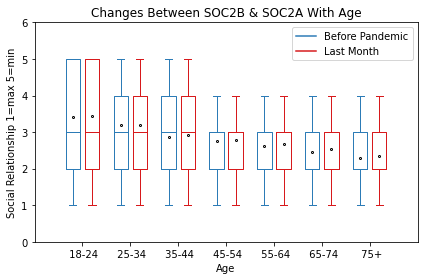

In [163]:
se2_age=df[['SOC2B','SOC2A','AGE7']]

se2_age.drop(se2_age.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_age.drop(se2_age.loc[df['AGE7']== '(88) Removed for disclosure risk'].index, inplace=True)

se2_age['SOC2B']=se2_age['SOC2B'].str[1:]
se2_age['SOC2B'] = se2_age['SOC2B'].str.split(')').str[0].astype(int)
se2_age['SOC2A']=se2_age['SOC2A'].str[1:]
se2_age['SOC2A'] = se2_age['SOC2A'].str.split(')').str[0].astype(int)

ticks = se2_age['AGE7'].str.split(')').str[1].unique();
cols = se2_age['AGE7'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se2_age['AGE7'] == cols[i]
    data_b.append(se2_age[mask]['SOC2B'])
    data_a.append(se2_age[mask]['SOC2A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_a)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_b)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=max 5=min')
plt.xlabel('Age')
plt.title('Changes Between SOC2B & SOC2A With Age')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 6)
plt.tight_layout()
plt.savefig('C:\python\se2-age.png',format='png', dpi=600)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1618012543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_sex.drop(se2_sex.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1618012543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_sex.drop(se2_sex.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1618012543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

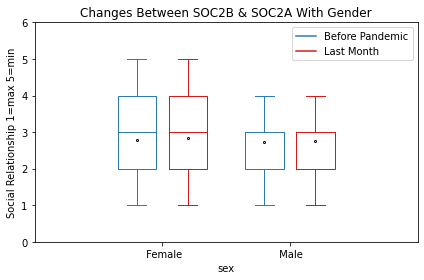

In [208]:
se2_sex=df[['SOC2B','SOC2A','GENDER']]

se2_sex.drop(se2_sex.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_sex.drop(se2_sex.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex.drop(se2_sex.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_sex.drop(se2_sex.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex.drop(se2_sex.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_sex.drop(se2_sex.loc[df['GENDER']== '(98) SKIPPED ON WEB'].index, inplace=True)

se2_sex['SOC2B']=se2_sex['SOC2B'].str[1:]
se2_sex['SOC2B'] = se2_sex['SOC2B'].str.split(')').str[0].astype(int)
se2_sex['SOC2A']=se2_sex['SOC2A'].str[1:]
se2_sex['SOC2A'] = se2_sex['SOC2A'].str.split(')').str[0].astype(int)

ticks = se2_sex['GENDER'].str.split(')').str[1].unique();
cols = se2_sex['GENDER'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se2_sex['GENDER'] == cols[i]
    data_b.append(se2_sex[mask]['SOC2B'])
    data_a.append(se2_sex[mask]['SOC2A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_a)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_b)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=max 5=min')
plt.xlabel('sex')
plt.title('Changes Between SOC2B & SOC2A With Gender')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 6)
plt.tight_layout()
plt.savefig('C:\python\se2-sex.png',format='png', dpi=600)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1157476662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_sex1.drop(se2_sex1.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1157476662.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_sex1.drop(se2_sex1.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1157476662.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

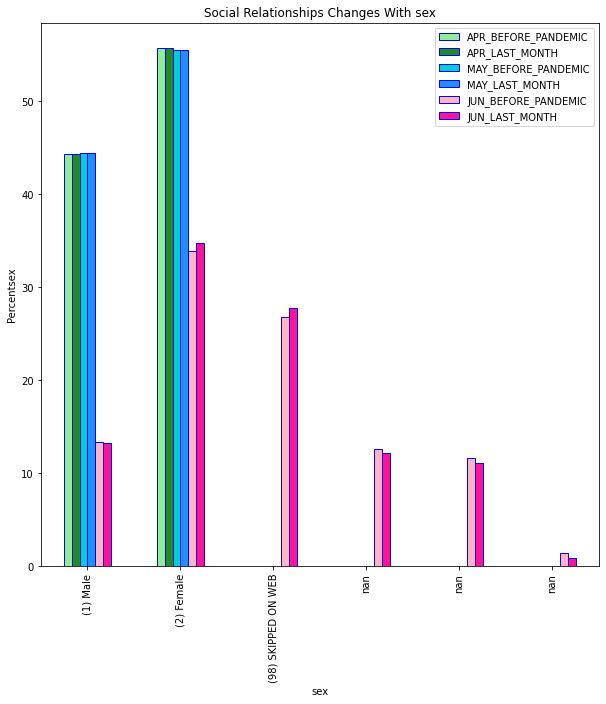

In [226]:
#histogram
se2_sex1=df1[['SOC2B','SOC2A','GENDER']]
se2_sex2=df2[['SOC2B','SOC2A','GENDER']]
se2_sex3=df3[['SOC2B','SOC2A','GENDER']]
data1=[]

se2_sex1.drop(se2_sex1.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_sex1.drop(se2_sex1.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex1.drop(se2_sex1.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_sex1.drop(se2_sex1.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex1.drop(se2_sex1.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)

se2_sex2.drop(se2_sex2.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_sex2.drop(se2_sex2.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex2.drop(se2_sex2.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_sex2.drop(se2_sex2.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex2.drop(se2_sex2.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)

se2_sex3.drop(se2_sex3.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_sex3.drop(se2_sex3.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex3.drop(se2_sex3.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_sex3.drop(se2_sex3.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex3.drop(se2_sex3.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)

se2_sex1.drop(se2_sex1.loc[df['GENDER']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex2.drop(se2_sex2.loc[df['GENDER']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_sex3.drop(se2_sex3.loc[df['GENDER']== '(98) SKIPPED ON WEB'].index, inplace=True)


se2_sex1b= se2_sex1[['SOC2B','GENDER']]
se2_sex1a= se2_sex1[['SOC2A','GENDER']]

data1B=se2_sex1b['GENDER'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='APR_BEFORE_PANDEMIC')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se2_sex1a['GENDER'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='APR_LAST_MONTH')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se2_sex2b= se2_sex2[['SOC2B','GENDER']]
se2_sex2a= se2_sex2[['SOC2A','GENDER']]

data2B=se2_sex2b['GENDER'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='MAY_BEFORE_PANDEMIC')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se2_sex2a['GENDER'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='MAY_LAST_MONTH')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se2_sex3b= se2_sex3[['SOC2B','GENDER']]
se2_sex3a= se2_sex3[['SOC2A','GENDER']]

data3B=se2_sex3b['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='JUN_BEFORE_PANDEMIC')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se2_sex3a['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='JUN_LAST_MONTH')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['APR_LAST_MONTH'],data2B['MAY_BEFORE_PANDEMIC'],data2A['MAY_LAST_MONTH'],data3B['JUN_BEFORE_PANDEMIC'],data3A['JUN_LAST_MONTH']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
data1 = pd.concat([data1B['unique_values'],x], axis = 1)

data1

plotdata = pd.DataFrame({
 "APR_BEFORE_PANDEMIC":data1['APR_BEFORE_PANDEMIC'].values,
    "APR_LAST_MONTH":data1['APR_LAST_MONTH'].values,
    "MAY_BEFORE_PANDEMIC":data1['MAY_BEFORE_PANDEMIC'].values,
    "MAY_LAST_MONTH":data1['MAY_LAST_MONTH'].values,
    "JUN_BEFORE_PANDEMIC":data1['JUN_BEFORE_PANDEMIC'].values,
    "JUN_LAST_MONTH":data1['JUN_LAST_MONTH'].values
    },
    index=data1['unique_values']
)
color_dict = {'APR_BEFORE_PANDEMIC':'#90EE90',
              'APR_LAST_MONTH':'#228B22',
              'MAY_BEFORE_PANDEMIC': '#00CED1',
              'MAY_LAST_MONTH': '#1E90FF',
              'JUN_BEFORE_PANDEMIC': '#FFB6C1',
              'JUN_LAST_MONTH': '#FF1493',
              }
plotdata.plot(kind="bar",figsize=(10,10) , color = color_dict,edgecolor=['b'])
plt.title("Social Relationships Changes With sex")
plt.xlabel("sex")
plt.ylabel("Percentsex")
# plt.savefig(SE01.png)
plt.savefig("C:\python\se2-hist-sex.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [224]:
se2_sex1=df1[['SOC2B','SOC2A','GENDER']]
se2_sex1.

,unique_values,APR_BEFORE_PANDEMIC,APR_LAST_MONTH,MAY_BEFORE_PANDEMIC,MAY_LAST_MONTH,JUN_BEFORE_PANDEMIC,JUN_LAST_MONTH
0,(1) Male,44.322814,44.322814,44.424173,44.424173,13.396021,13.218861
1,(2) Female,55.653895,55.653895,55.530217,55.530217,33.919324,34.736986
2,(98) SKIPPED ON WEB,0.023291,0.023291,0.045610,0.045610,26.819297,27.718724
3,NaN,NaN,NaN,NaN,NaN,12.619242,12.183156
4,NaN,NaN,NaN,NaN,NaN,11.597165,11.133824
5,NaN,NaN,NaN,NaN,NaN,1.430908,0.858545


C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1833924094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_inc.drop(se2_inc.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1833924094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_inc.drop(se2_inc.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1833924094.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

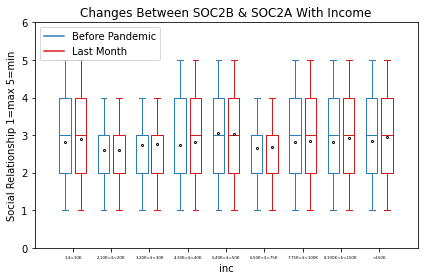

In [207]:
se2_inc=df[['SOC2B','SOC2A','HHINCOME']]

# se2_inc['HHINCOME'].unique()

se2_inc.drop(se2_inc.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_inc.drop(se2_inc.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_inc.drop(se2_inc.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_inc.drop(se2_inc.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_inc.drop(se2_inc.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_inc.drop(se2_inc.loc[df['HHINCOME']== 'REFUSED'].index, inplace=True)
se2_inc.drop(se2_inc.loc[df['HHINCOME']== 'SKIPPED ON WEB'].index, inplace=True)
se2_inc.drop(se2_inc.loc[df['HHINCOME']== "DON'T KNOW"].index, inplace=True)
df['HHINCOME'] = df['HHINCOME'].replace(['Under $10,000'],'1-$<10K')
df['HHINCOME'] = df['HHINCOME'].replace(['$10,000 to under $20,000'],'2-10K<$<20K')
df['HHINCOME'] = df['HHINCOME'].replace(['$20,000 to under $30,000'],'3-20K<$<30K')
df['HHINCOME'] = df['HHINCOME'].replace(['$30,000 to under $40,000'],'4-30K<$<40K')
df['HHINCOME'] = df['HHINCOME'].replace(['$40,000 to under $50,000'],'5-40K<$<50K')
df['HHINCOME'] = df['HHINCOME'].replace(['$50,000 to under $75,000'],'6-50K<$<75K')
df['HHINCOME'] = df['HHINCOME'].replace(['$75,000 to under $100,000'],'7-75K<$<100K')
df['HHINCOME'] = df['HHINCOME'].replace(['$100,000 to under $150,000'],'8-100K<$<150K')
df['HHINCOME'] = df['HHINCOME'].replace(['$150,000 or more'],'9-$>150K')



se2_inc['SOC2B']=se2_inc['SOC2B'].str[1:]
se2_inc['SOC2B'] = se2_inc['SOC2B'].str.split(')').str[0].astype(int)
se2_inc['SOC2A']=se2_inc['SOC2A'].str[1:]
se2_inc['SOC2A'] = se2_inc['SOC2A'].str.split(')').str[0].astype(int)

ticks = se2_inc['HHINCOME'].sort_values().unique()
cols = se2_inc['HHINCOME'].unique()
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se2_inc['HHINCOME'] == cols[i]
    data_b.append(se2_inc[mask]['SOC2B'])
    data_a.append(se2_inc[mask]['SOC2A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_a)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_b)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=max 5=min')
plt.xlabel('inc')
plt.xticks(fontsize=4)
plt.title('Changes Between SOC2B & SOC2A With Income')


plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 6)
plt.tight_layout()
plt.savefig('C:\python\se2-inc.png',format='png', dpi=600)



C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\6603176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_edu.drop(se2_edu.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\6603176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_edu.drop(se2_edu.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\6603176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

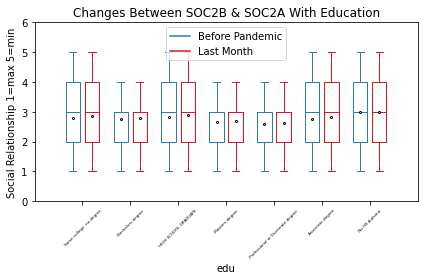

In [215]:
se2_edu=df[['SOC2B','SOC2A','EDUCATION']]

se2_edu['EDUCATION'].unique()


se2_edu.drop(se2_edu.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_edu.drop(se2_edu.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_edu.drop(se2_edu.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_edu.drop(se2_edu.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_edu.drop(se2_edu.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_edu.drop(se2_edu.loc[df['EDUCATION']== '(99) REFUSED'].index, inplace=True)
se2_edu.drop(se2_edu.loc[df['EDUCATION']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_edu.drop(se2_edu.loc[df['EDUCATION']== '(77) Not sure'].index, inplace=True)
df['EDUCATION'] = df['EDUCATION'].replace(['(2) HIGH SCHOOL GRADUATE - high school DIPLOMA or the equivalent (GED)'],'(2) HIGH SCHOOL GRADUATE')


se2_edu['SOC2B']=se2_edu['SOC2B'].str[1:]
se2_edu['SOC2B'] = se2_edu['SOC2B'].str.split(')').str[0].astype(int)
se2_edu['SOC2A']=se2_edu['SOC2A'].str[1:]
se2_edu['SOC2A'] = se2_edu['SOC2A'].str.split(')').str[0].astype(int)

ticks = se2_edu['EDUCATION'].str.split(')').str[1].unique();
cols = se2_edu['EDUCATION'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se2_edu['EDUCATION'] == cols[i]
    data_b.append(se2_edu[mask]['SOC2B'])
    data_a.append(se2_edu[mask]['SOC2A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_a)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_b)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=max 5=min')
plt.xlabel('edu')
plt.xticks(fontsize=4 , rotation=45)
plt.title('Changes Between SOC2B & SOC2A With Education')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 6)
plt.tight_layout()
plt.savefig('C:\python\se2-edu.png',format='png', dpi=600)


C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\215391197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_rac.drop(se2_rac.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\215391197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_rac.drop(se2_rac.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\215391197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

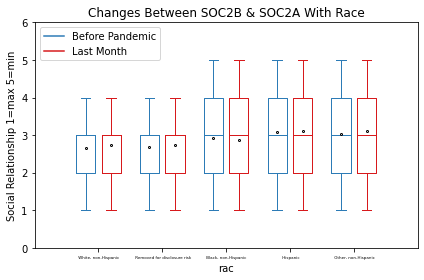

In [219]:
se2_rac=df[['SOC2B','SOC2A','RACETH']]

se2_rac['RACETH'].unique()


se2_rac.drop(se2_rac.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_rac.drop(se2_rac.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_rac.drop(se2_rac.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_rac.drop(se2_rac.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_rac.drop(se2_rac.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_rac.drop(se2_rac.loc[df['RACETH']== '(99) REFUSED'].index, inplace=True)
se2_rac.drop(se2_rac.loc[df['RACETH']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_rac.drop(se2_rac.loc[df['RACETH']== "(77) DON'T KNOW"].index, inplace=True)

se2_rac['SOC2B']=se2_rac['SOC2B'].str[1:]
se2_rac['SOC2B'] = se2_rac['SOC2B'].str.split(')').str[0].astype(int)
se2_rac['SOC2A']=se2_rac['SOC2A'].str[1:]
se2_rac['SOC2A'] = se2_rac['SOC2A'].str.split(')').str[0].astype(int)

ticks = se2_rac['RACETH'].str.split(')').str[1].unique();
cols = se2_rac['RACETH'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se2_rac['RACETH'] == cols[i]
    data_b.append(se2_rac[mask]['SOC2B'])
    data_a.append(se2_rac[mask]['SOC2A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_a)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_b)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=max 5=min')
plt.xlabel('rac')
plt.xticks(fontsize=4)
plt.title('Changes Between SOC2B & SOC2A With Race')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 6)
plt.tight_layout()
plt.savefig('C:\python\se2-rac.png',format='png', dpi=600)

<AxesSubplot:title={'center':'SOC2B'}, xlabel='AGE7'>

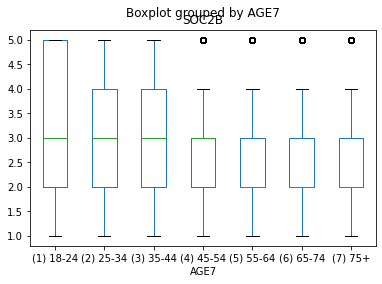

In [128]:
se2_age[['SOC2B','AGE7']].boxplot(by ='AGE7', column =['SOC2B'], grid = False)
se2_age[['SOC2B','AGE7']].time_diff.quantile([0.25,0.5,0.75])


In [132]:
# se2_age[['SOC2B','AGE7']].SOC2B.quantile([0.25,0.5,0.75])
# se2-age1 = se2_age['AGE7'] == "(1) 18-24"
# mask_e1


tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

25219     True
15570     True
15595     True
15610     True
15621     True
         ...  
23157    False
2967     False
12715    False
4116     False
16878    False
Name: AGE7, Length: 24670, dtype: bool

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\3409972692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_age.drop(se2_age.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\3409972692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_age.drop(se2_age.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\3409972692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

<AxesSubplot:xlabel='AGE7', ylabel='value'>

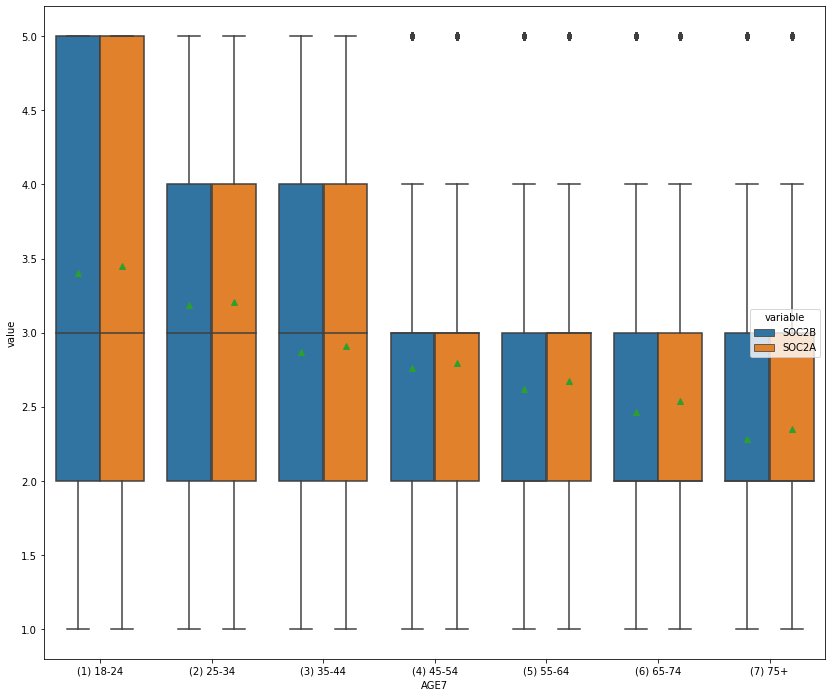

In [134]:
se2_age=df[['SOC2B','SOC2A','AGE7']]

se2_age.drop(se2_age.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_age.drop(se2_age.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_age.drop(se2_age.loc[df['AGE7']== '(88) Removed for disclosure risk'].index, inplace=True)

se2_age['SOC2B']=se2_age['SOC2B'].str[1:]
se2_age['SOC2B'] = se2_age['SOC2B'].str.split(')').str[0].astype(int)
se2_age['SOC2A']=se2_age['SOC2A'].str[1:]
se2_age['SOC2A'] = se2_age['SOC2A'].str.split(')').str[0].astype(int)

plt.figure(figsize=(14,12))
se2_age=se2_age.sort_values('AGE7')
df_plot = se2_age.melt(id_vars='AGE7', value_vars=["SOC2B", "SOC2A"])
sns.boxplot(x='AGE7', y='value', hue='variable', data=df_plot , showmeans=True)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1938038227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_gender.drop(se2_gender.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1938038227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se2_gender.drop(se2_gender.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_5032\1938038227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

<AxesSubplot:xlabel='GENDER', ylabel='value'>

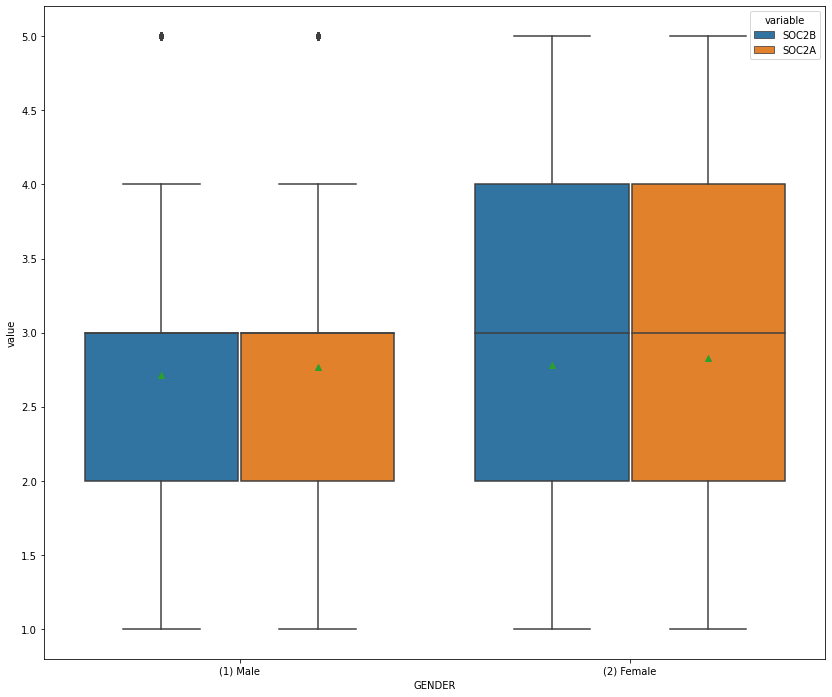

In [135]:
se2_gender=df[['SOC2B','SOC2A','GENDER']]

se2_gender.drop(se2_gender.loc[df['SOC2B']== '(77) Not sure'].index, inplace=True)
se2_gender.drop(se2_gender.loc[df['SOC2B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_gender.drop(se2_gender.loc[df['SOC2A']== '(77) Not sure'].index, inplace=True)
se2_gender.drop(se2_gender.loc[df['SOC2A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se2_gender.drop(se2_gender.loc[df['SOC2A']== '(99) REFUSED'].index, inplace=True)
se2_gender.drop(se2_gender.loc[df['GENDER']== '(98) SKIPPED ON WEB'].index, inplace=True)

se2_gender['SOC2B']=se2_gender['SOC2B'].str[1:]
se2_gender['SOC2B'] = se2_gender['SOC2B'].str.split(')').str[0].astype(int)
se2_gender['SOC2A']=se2_gender['SOC2A'].str[1:]
se2_gender['SOC2A'] = se2_gender['SOC2A'].str.split(')').str[0].astype(int)

plt.figure(figsize=(14,12))
se2_gender=se2_gender.sort_values('GENDER')
df_plot = se2_gender.melt(id_vars='GENDER', value_vars=["SOC2B", "SOC2A"])
sns.boxplot(x='GENDER', y='value', hue='variable', data=df_plot,showmeans=True)

In [122]:
se2_gender=df[['SOC2B','SOC2A','GENDER']]
se2_gender['GENDER'].unique()

array(['(2) Female', '(1) Male', '(98) SKIPPED ON WEB'], dtype=object)

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

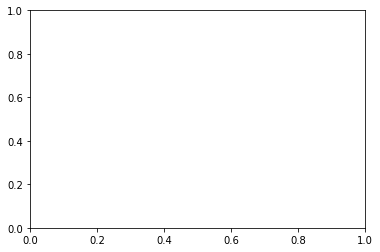

In [109]:
# the summer and winter rain fall amount
summer_rain = se2_age[['SOC2B','AGE7']]
winter_rain = se2_age[['SOC2A','AGE7']]

# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['1', '2', '3','4', '5','6', '7']

# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
summer_rain_plot = plt.boxplot(summer_rain,
                               positions=np.array(
    np.arange(len(summer_rain)))*2.0-0.35,
                               widths=0.6)
winter_rain_plot = plt.boxplot(winter_rain,
                               positions=np.array(
    np.arange(len(winter_rain)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)

    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()


# setting colors for each groups
define_box_properties(summer_rain_plot, '#D7191C', 'Summer')
define_box_properties(winter_rain_plot, '#2C7BB6', 'Winter')

# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)

# set the limit for x axis
plt.xlim(-2, len(ticks)*2)

# set the limit for y axis
plt.ylim(0, 50)

# set the title
plt.title('Grouped boxplot using matplotlib')

In [115]:
import alt
alt.Chart(
    se2_age.reset_index().melt(id_vars = ["AGE7"], value_vars=["SOC2B", "SOC2A"]).assign(age = lambda x: x["AGE7"].dt.age)
).mark_boxplot(
    extent='min-max'
).encode(
    alt.X('variable:N', title=''),
    alt.Y('value:Q'),
    column='age:N',
    color='variable:N'
)

AttributeError: module 'alt' has no attribute 'Chart'

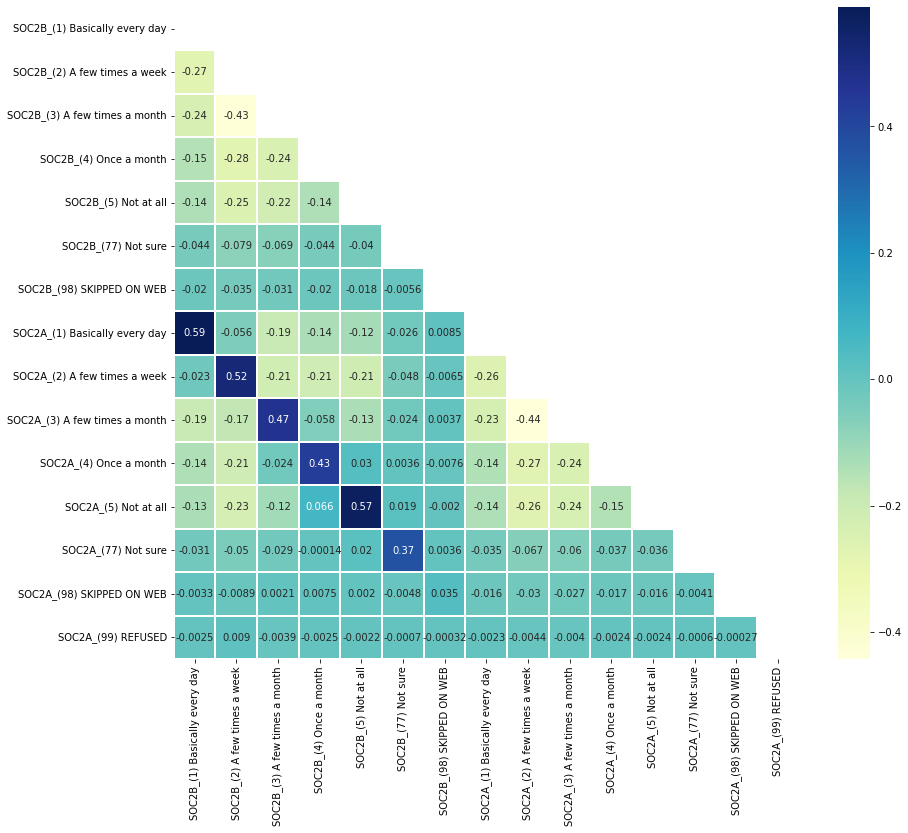

In [10]:
import numpy as np
SE1 = pd.get_dummies(df[['SOC2B','SOC2A']])
plt.figure(figsize=(14,12))
SE1_CORR = SE1.corr()
matrix = np.triu(SE1_CORR)
s=sns.heatmap(SE1_CORR,linewidths=.1,cmap="YlGnBu", annot=True, mask=matrix)
plt.yticks(rotation=0);
plt.savefig("C:\python\SE01-CORR.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [106]:
se2_age

,SOC2B,SOC2A,AGE7
0,4,4,(3) 35-44
1,3,3,(6) 65-74
2,3,3,(6) 65-74
3,2,2,(6) 65-74
4,1,1,(6) 65-74
...,...,...,...
25215,3,3,(5) 55-64
25216,1,2,(7) 75+
25217,2,2,(7) 75+
25218,5,5,(6) 65-74


In [58]:
# SE1 : Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic


,april_before,april_after,may_before,may_after,june_before,june_after
0,13.259606,10.990765,13.153193,11.813310,13.305752,13.185640
1,32.219815,31.581348,33.217954,33.050469,33.951688,34.832510
2,28.172386,28.810854,27.679768,28.662349,26.865074,27.719205
3,13.658648,14.376924,13.398839,12.539080,12.651808,12.131323
4,11.332801,13.156995,11.076373,12.795891,11.584145,11.090351
5,1.094516,0.889294,1.205895,0.926753,1.427999,0.880822
6,0.262228,0.182419,0.267977,0.212148,0.213533,0.160149


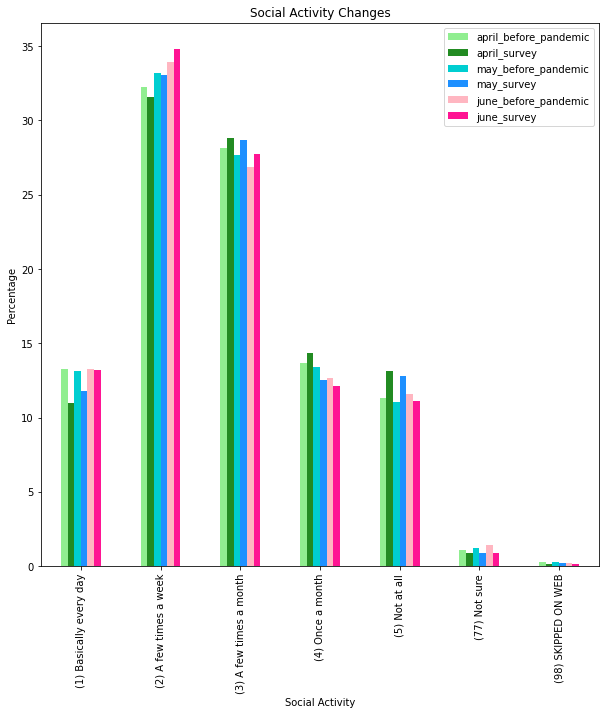

In [57]:
import matplotlib.pyplot as plt

plotdata = pd.DataFrame({
 "april_before_pandemic":data1['april_before'].values,
    "april_survey":data1['april_after'].values,
    "may_before_pandemic":data1['may_before'].values,
    "may_survey":data1['may_after'].values,
    "june_before_pandemic":data1['june_before'].values,
    "june_survey":data1['june_after'].values
    },
    index=data1['unique_values']
)
color_dict = {'april_before_pandemic':'#90EE90',
              'april_survey':'#228B22',
              'may_before_pandemic': '#00CED1',
              'may_survey': '#1E90FF',
              'june_before_pandemic': '#FFB6C1',
              'june_survey': '#FF1493',
              }
plotdata.plot(kind="bar",figsize=(10,10) , color = color_dict)
plt.title("Social Activity Changes")
plt.xlabel("Social Activity")
plt.ylabel("Percentage")
# plt.savefig(SE01.png)
plt.savefig("C:\python\SE01-BAR.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [36]:

import pandas as pd
from scipy.stats import chi2_contingency


table = pd.crosstab(df['SOC2B'],df['SOC2A'])
# print(table)
stat, pvalue, dof, expected = chi2_contingency(table)
print('Chi-sq Test Statistics = %.3f \nP-Value = %.3f \nDegrees of Freedom = %.3f' % (stat, pvalue, dof))

Chi-sq Test Statistics = 32905.641 
P-Value = 0.000 
Degrees of Freedom = 42.000


In [ ]:
data1['april_before'].values

In [35]:
SE1

SOC2A,(1) Basically every day,(2) A few times a week,(3) A few times a month,(4) Once a month,(5) Not at all,(77) Not sure,(98) SKIPPED ON WEB,(99) REFUSED
SOC2B,,,,,,,,
(1) Basically every day,2030,1011,215,33,39,5,5,0
(2) A few times a week,781,5678,1445,260,150,19,11,1
(3) A few times a month,131,1166,4377,818,425,32,14,0
(4) Once a month,23,276,727,1680,601,30,9,0
(5) Not at all,20,152,329,453,1853,41,6,0
(77) Not sure,14,40,58,44,56,99,0,0
(98) SKIPPED ON WEB,11,17,20,5,7,1,2,0
